# About Dataset

### Abstract:

Concrete is the most important material in civil engineering. The 
concrete compressive strength is a highly nonlinear function of age and 
ingredients. These ingredients include cement, blast furnace slag, fly ash, 
water, superplasticizer, coarse aggregate, and fine aggregate.

### Data Characteristics:
    
The actual concrete compressive strength (MPa) for a given mixture under a 
specific age (days) was determined from laboratory. Data is in raw form (not scaled).

### Feature Information:

Cement -- quantitative -- kg in a m3 mixture -- Input Variable

Blast Furnace Slag -- quantitative -- kg in a m3 mixture -- Input Variable

Fly Ash -- quantitative -- kg in a m3 mixture -- Input Variable

Water -- quantitative -- kg in a m3 mixture -- Input Variable

Superplasticizer -- quantitative -- kg in a m3 mixture -- Input Variable

Coarse Aggregate -- quantitative -- kg in a m3 mixture -- Input Variable

Fine Aggregate -- quantitative -- kg in a m3 mixture -- Input Variable

Age -- quantitative -- Day (1~365) -- Input Variable

Concrete compressive strength -- quantitative -- MPa -- Output Variable

# About Linear Regression

Linear Regression is a type of supervised learning algorithm used in machine learning and statistics to predict a continuous target variable based on one or more independent variables, also known as predictors or features. It is a simple and widely used algorithm that models the relationship between the dependent variable and one or more independent variables by fitting a linear equation to the data.

In a Linear Regression model, the dependent variable, also known as the response variable, is modeled as a linear combination of the independent variables, also known as the explanatory or predictor variables. The equation for a simple linear regression model with one predictor variable can be written as:

y = b0 + b1*x + ε

where y is the response variable, x is the predictor variable, b0 is the intercept, b1 is the slope coefficient, and ε is the error term, which captures the unexplained variation in the response variable.

The goal of a Linear Regression model is to estimate the values of the parameters b0 and b1 that minimize the sum of squared errors between the predicted values and the actual values of the response variable in the training data. Once the model is trained, it can be used to predict the values of the response variable for new values of the predictor variable.

# Objective: 

First Exploring the data using basic Exploratory Data Analysis and gaining insights about the patterns and behaviour of different features contributing to the compressive strength of the concrete and then building a suitable model (Linear Regression) and predicting the compressive strength given the independent variable values.  

In [1]:
# Importing required Libraries
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
sns.set_style('whitegrid')

In [2]:
# Loading the dataset
df = pd.read_csv('concrete_data.csv')

In [3]:
# Checking the first 10 rows
df.head(10)

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   
5   266.0               114.0      0.0  228.0               0.0   
6   380.0                95.0      0.0  228.0               0.0   
7   380.0                95.0      0.0  228.0               0.0   
8   266.0               114.0      0.0  228.0               0.0   
9   475.0                 0.0      0.0  228.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30  
5             932.0           670.0   90     47.03  
6             932.0           594.0  365     43.70  
7             932.0           594.0   28     36.45  
8             932.0           670.0   28     45.85  
9             932.0           594.0   28     39.29

In [4]:
# Checking the number of rows and columns.

print('Total number of observations/rows are:', df.shape[0])
print('Total number of features/columns are:', df.shape[1])

Total number of observations/rows are: 1030
Total number of features/columns are: 9


In [5]:
# Checking the basic info of the data.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [6]:
# Checking the data description of all the variables, which gives us the count, mean, std, minimum, 25th quartile, 
# median, 75th quartile and maximum values in the respective numerical columns.

df.describe().T

count        mean         std     min      25%      50%  \
Cement              1030.0  281.167864  104.506364  102.00  192.375  272.900   
Blast Furnace Slag  1030.0   73.895825   86.279342    0.00    0.000   22.000   
Fly Ash             1030.0   54.188350   63.997004    0.00    0.000    0.000   
Water               1030.0  181.567282   21.354219  121.80  164.900  185.000   
Superplasticizer    1030.0    6.204660    5.973841    0.00    0.000    6.400   
Coarse Aggregate    1030.0  972.918932   77.753954  801.00  932.000  968.000   
Fine Aggregate      1030.0  773.580485   80.175980  594.00  730.950  779.500   
Age                 1030.0   45.662136   63.169912    1.00    7.000   28.000   
Strength            1030.0   35.817961   16.705742    2.33   23.710   34.445   

                         75%     max  
Cement               350.000   540.0  
Blast Furnace Slag   142.950   359.4  
Fly Ash              118.300   200.1  
Water                192.000   247.0  
Superplasticizer      10.200    32.2  
Coarse Aggregate    1029.400  1145.0  
Fine Aggregate       824.000   992.6  
Age                   56.000   365.0  
Strength              46.135    82.6

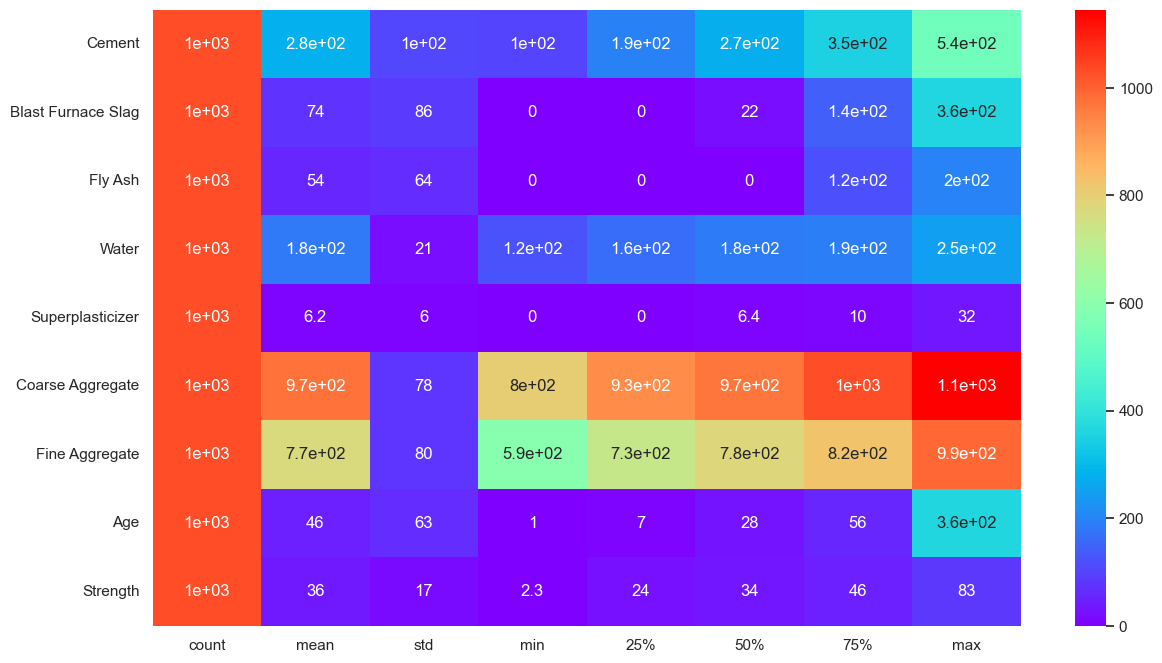

In [7]:
# Getting to know the distribution of each variable visually:

plt.figure(figsize=(14,8))
sns.heatmap(df.describe().T, annot= True, cmap='rainbow')
plt.show()

# Exploratory Data Analysis

## Univariate Analysis of the features

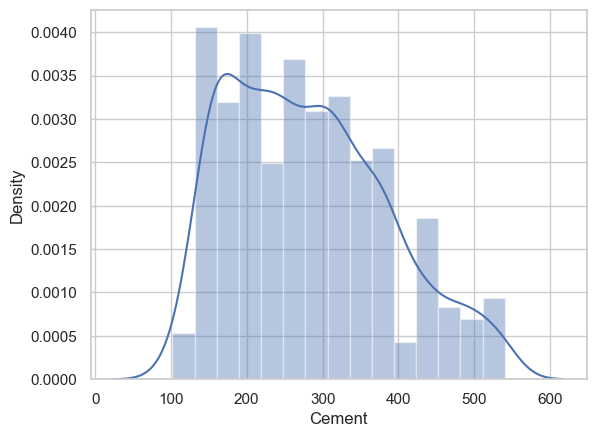

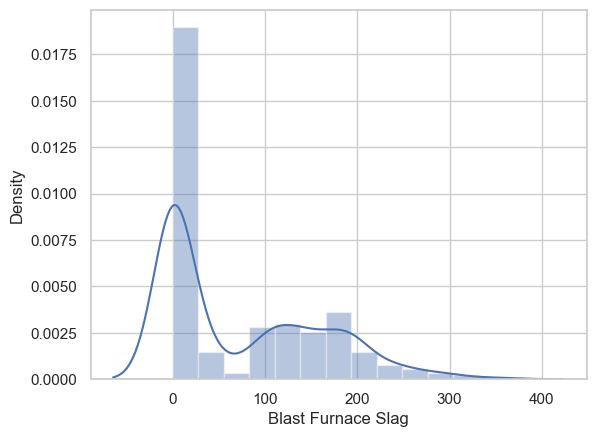

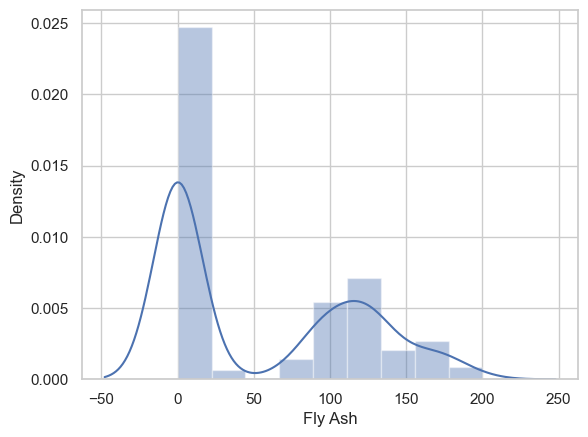

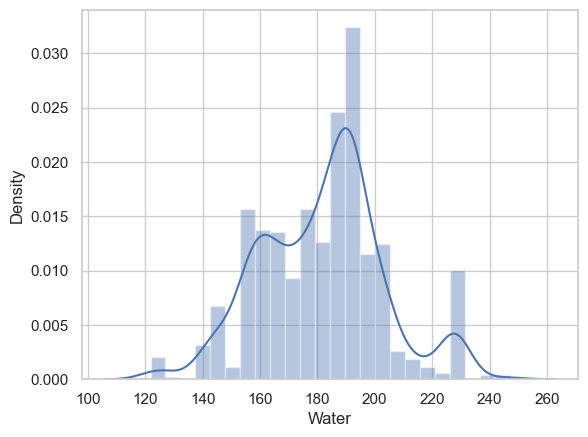

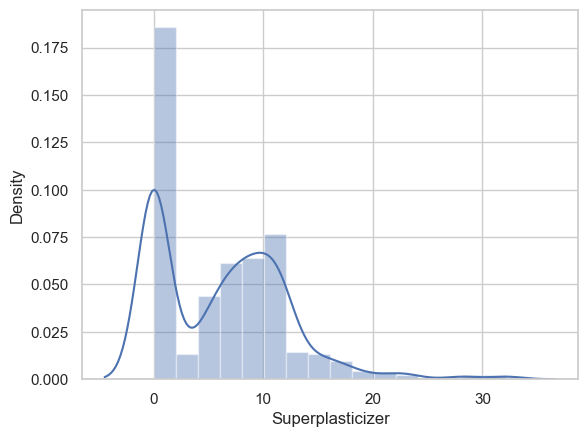

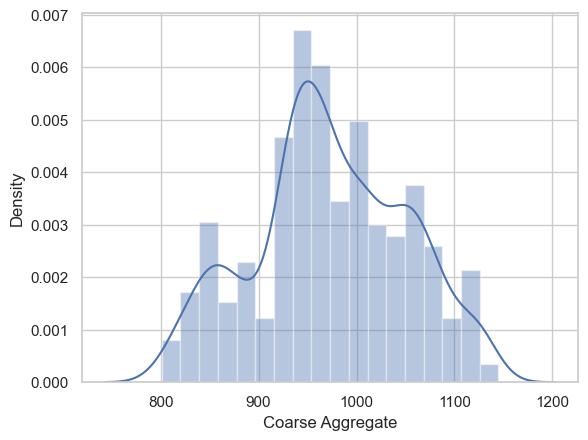

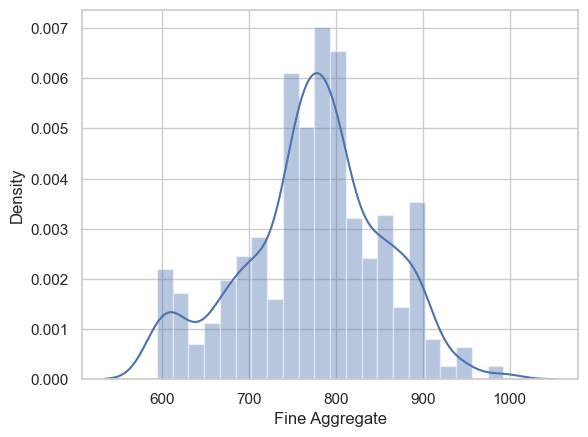

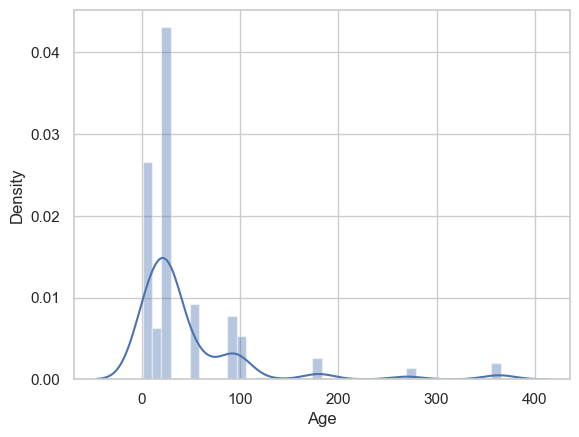

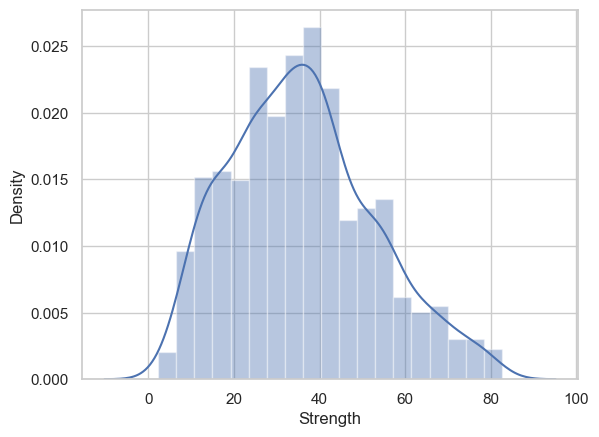

In [8]:
# Checking how the features are distributed

def dist_plot(cols):
    sns.distplot(df[cols])
    plt.show()
for i in df.columns:
    dist_plot(i)

Most of the features are not normally distributed. To obtain a linear regression model with highly accurate predictability, the features must be ideally normally distributed, however this can be achieved by using power transformational methods.

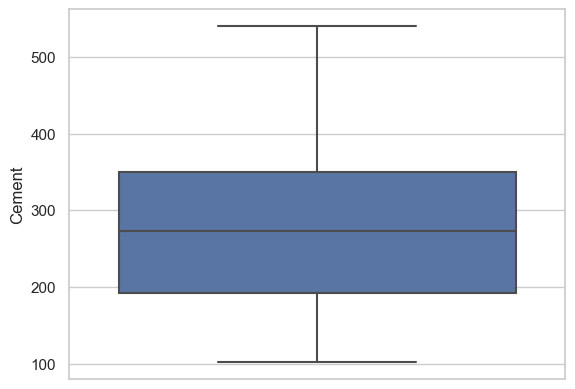

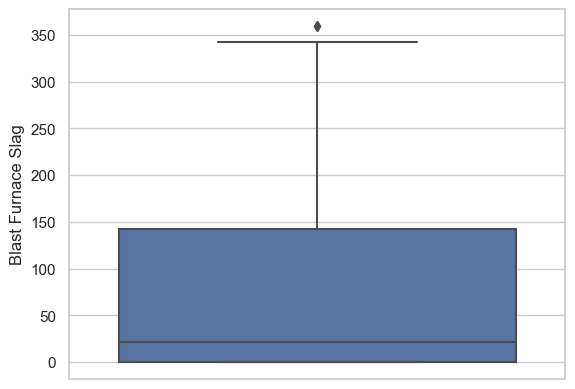

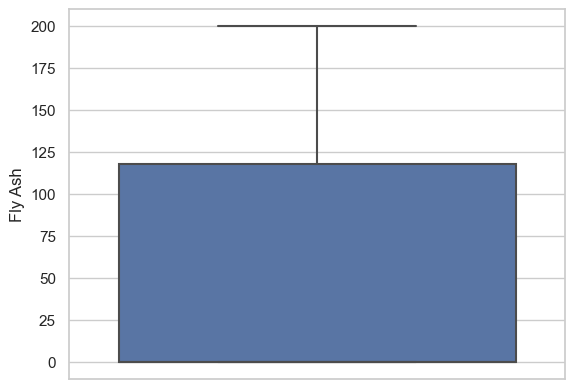

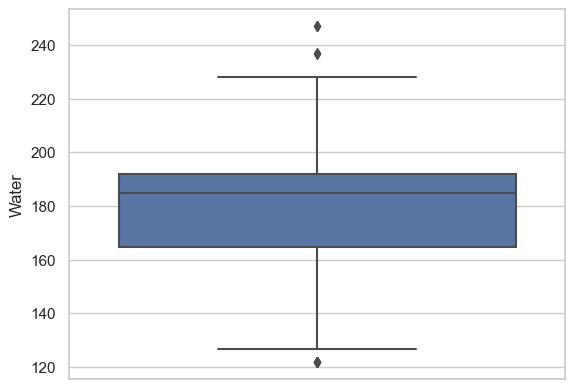

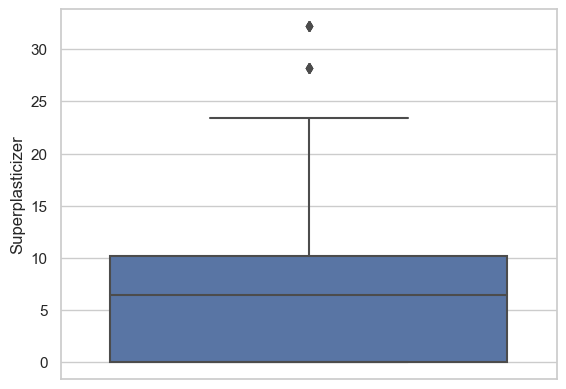

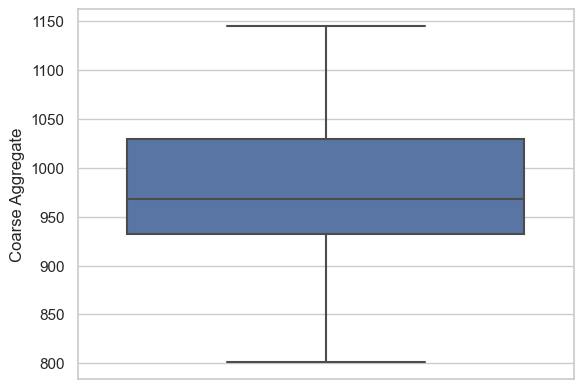

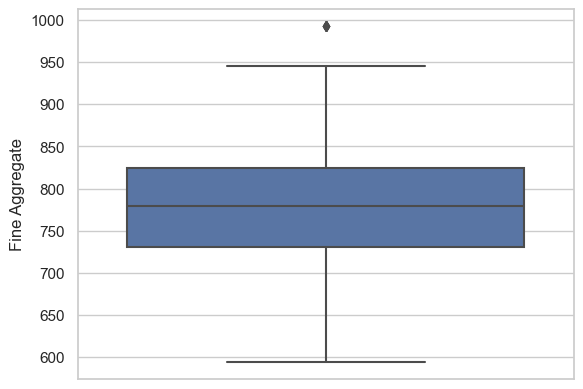

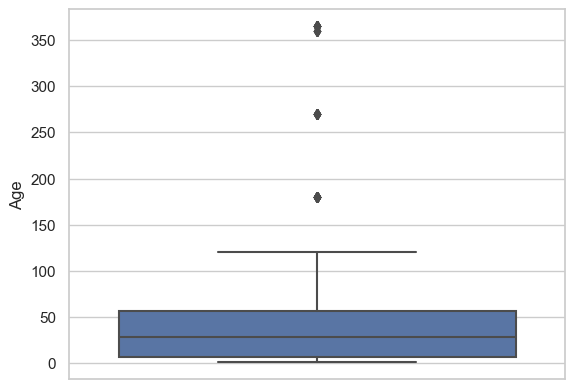

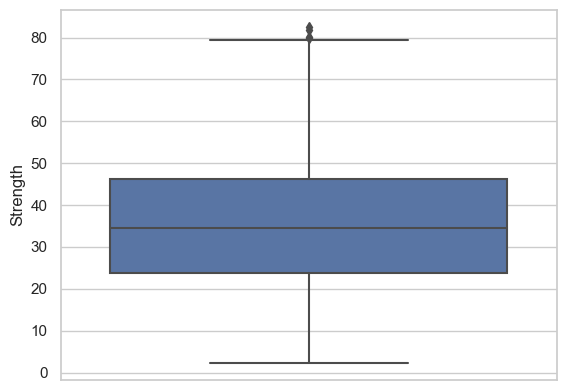

In [9]:
# Box plot gives us the upper limit and lower limit based on the interquartile range and indicates if there are any outliers
# present in the particular feature, it also indicates where the median, 1st quartile and 3rd quartile are on that particular
# feature.

def box_plot(cols):
    sns.boxplot(y = df[cols])
    plt.show()
for i in df.columns:
    box_plot(i)

There are a few outliers present in the data, however this will be treated/handled in the data preprocessing, A linear regression model works best when there is no presence of outliers.

## Bi-variate Analysis

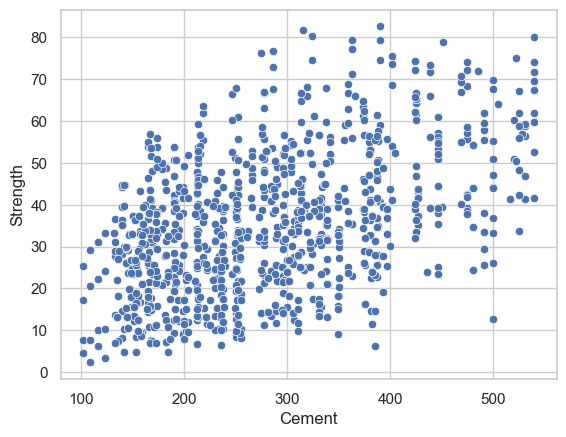

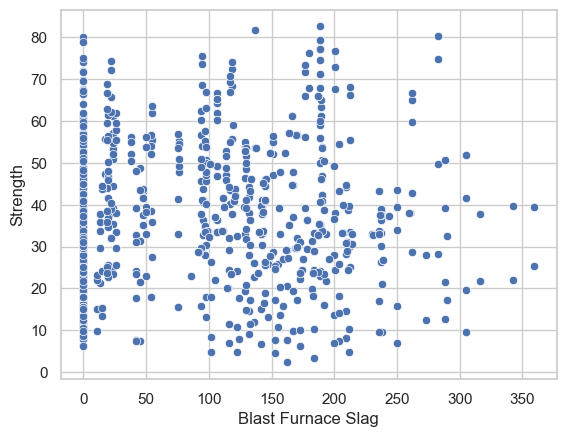

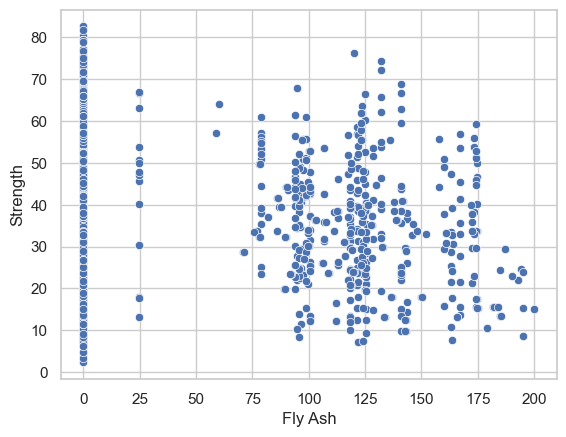

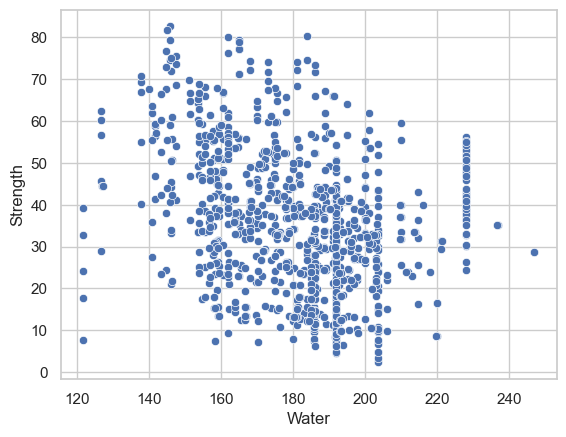

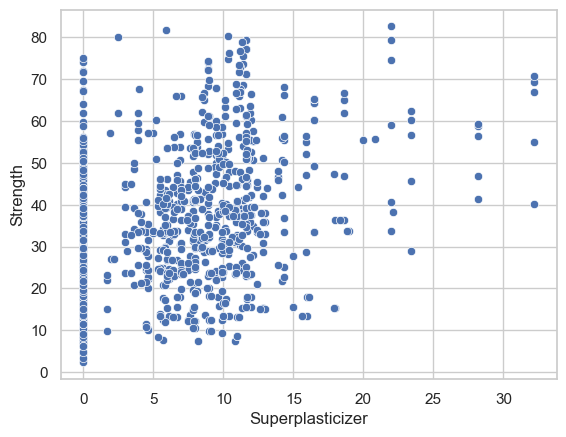

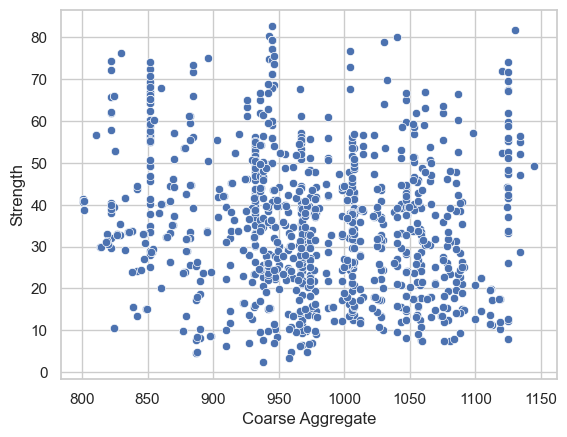

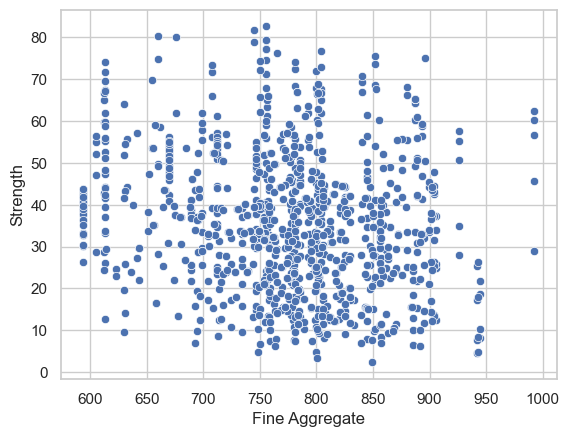

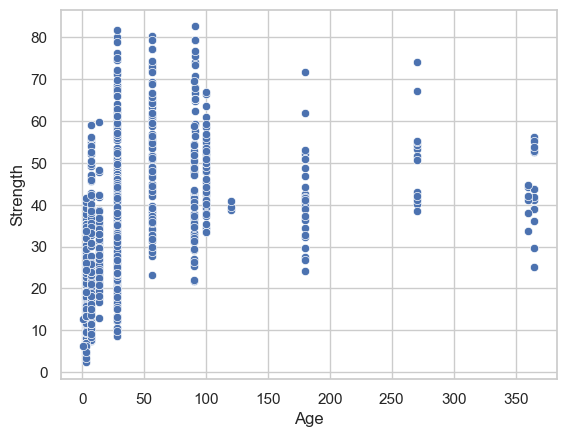

In [10]:
# Scatter plot of all variables against the target variable.

def scatter_plot(cols):
    sns.scatterplot(x=cols,y = 'Strength', data = df)
    plt.show()
for i in df.columns[:-1]:
    scatter_plot(i)

Although there is no clear linear relationship between all the features and Strength, it is true that all of the features when combined in an appropriate measure will lead to increase in the compressive strength of the concrete structure.

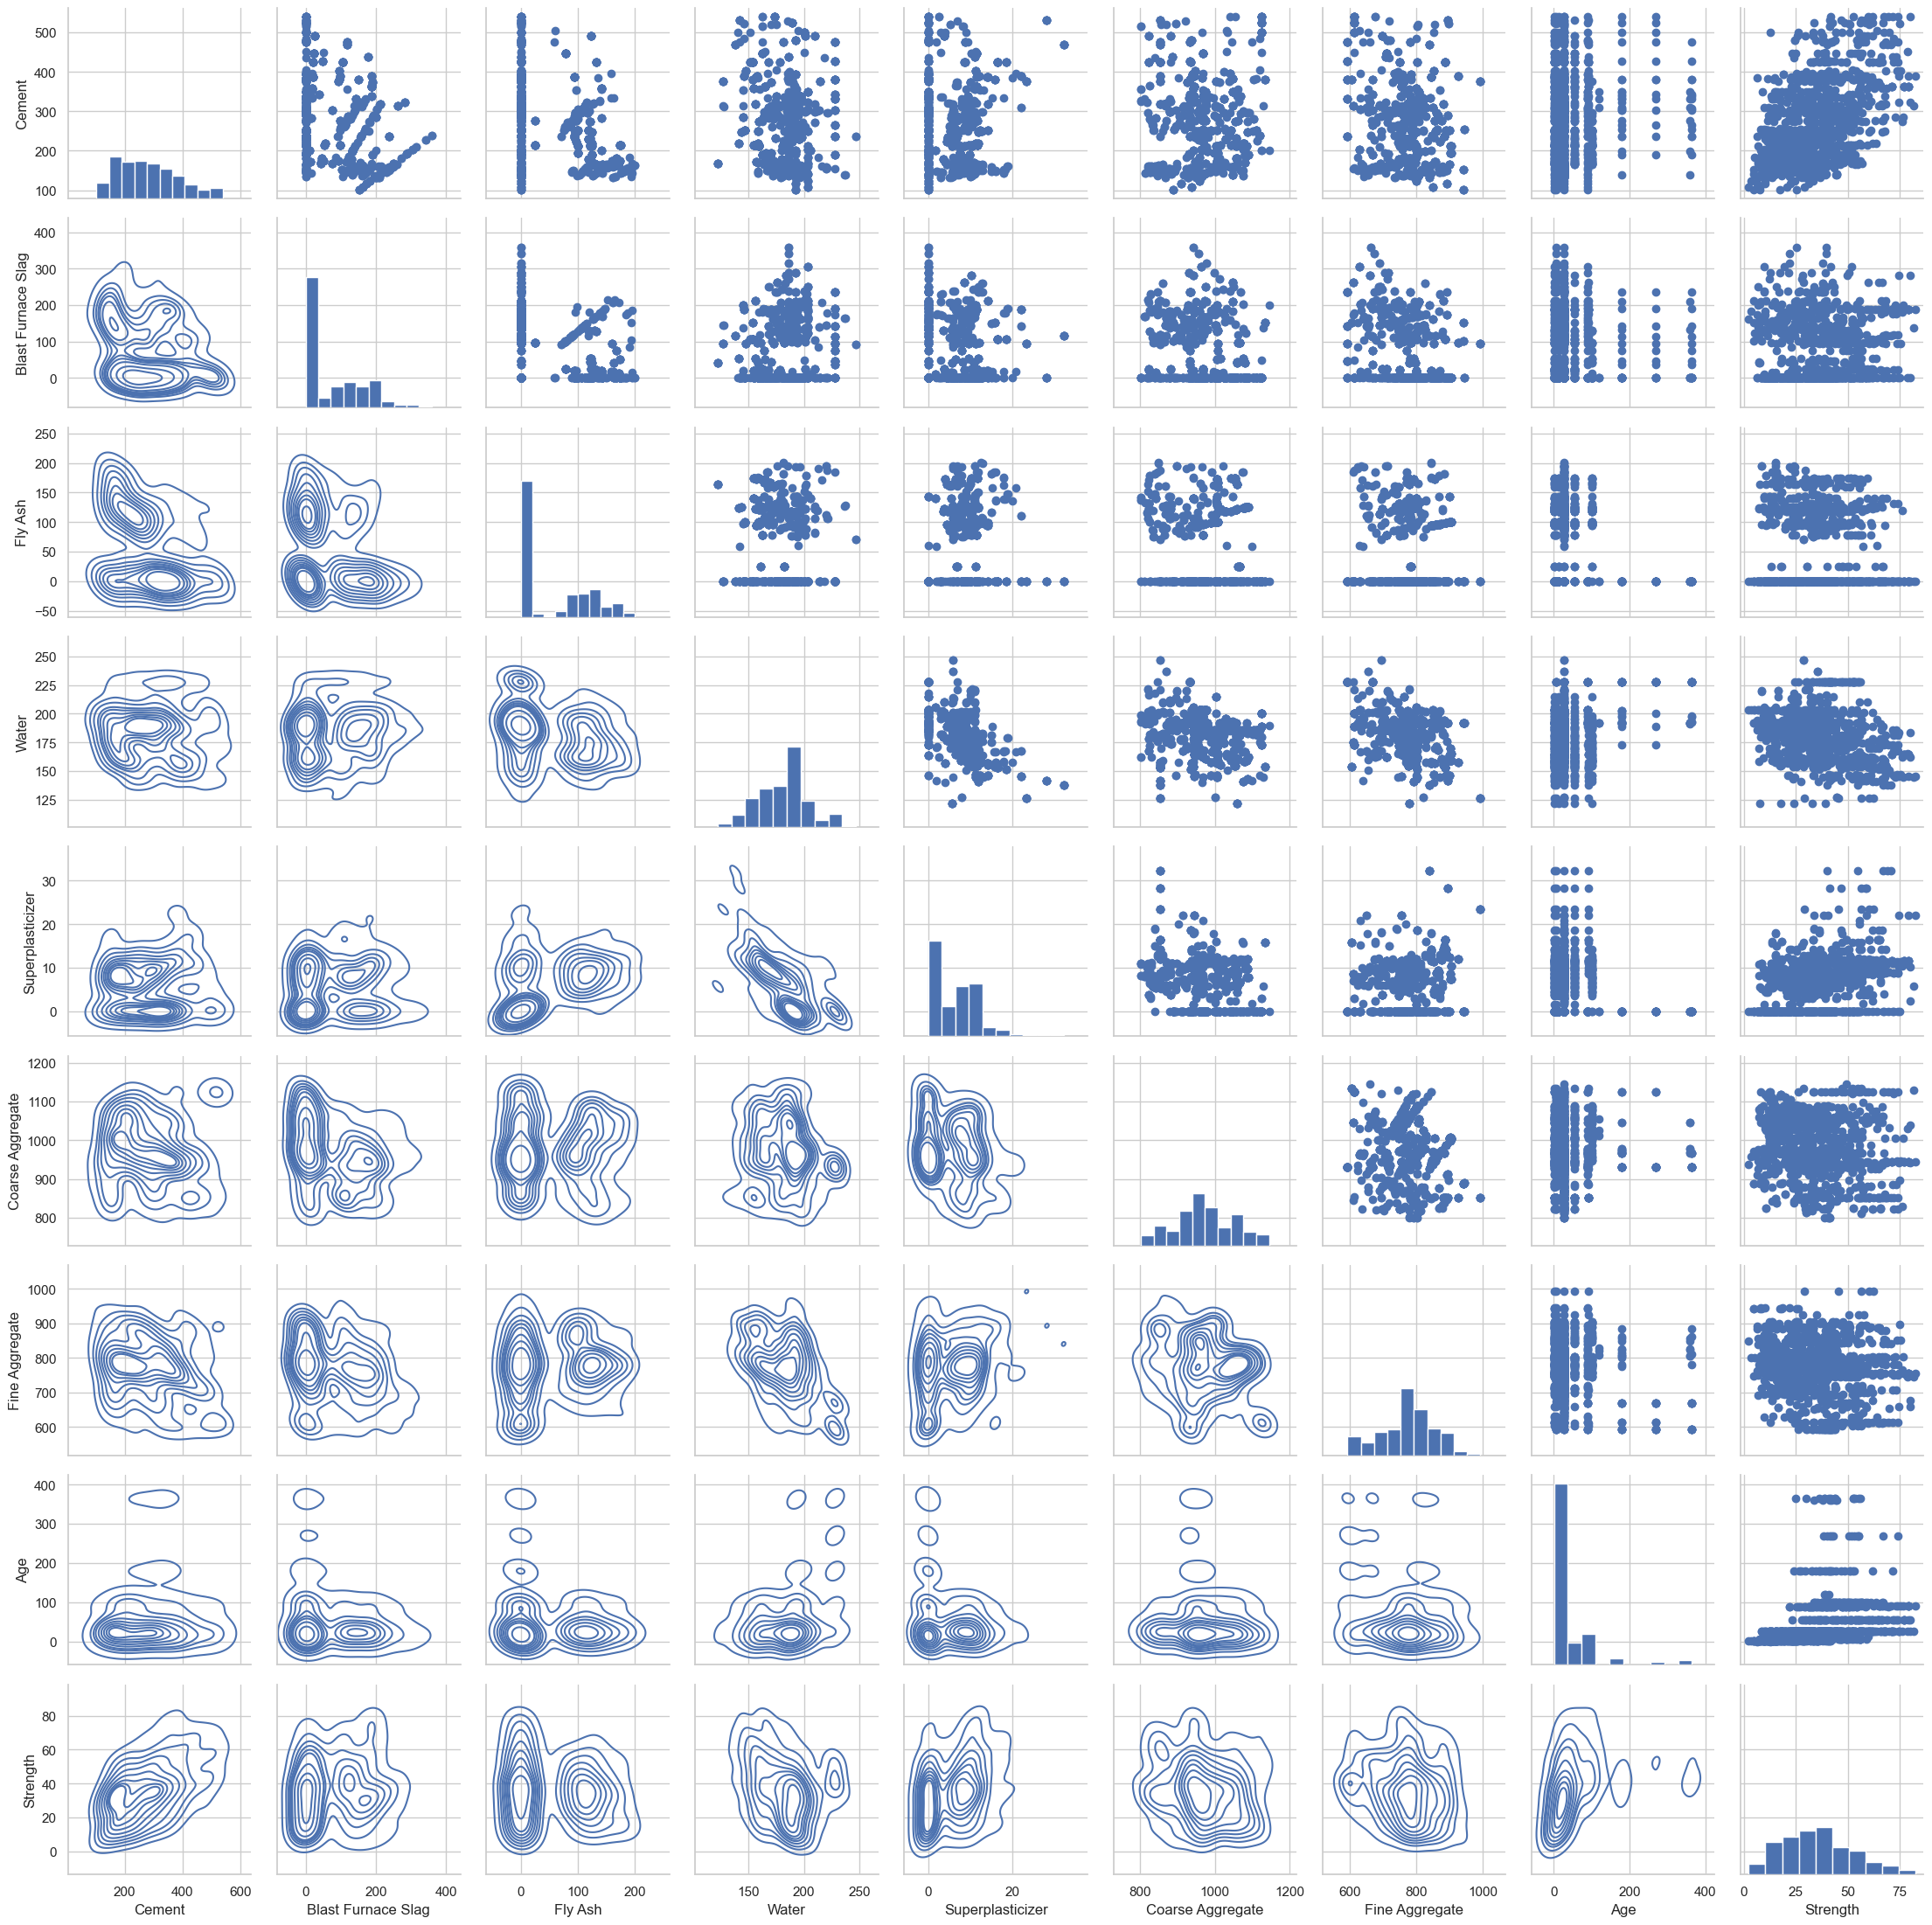

In [11]:
g = sns.PairGrid(df)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
plt.show()

In [12]:
# Checking the correlation matrix.

df.corr()

Cement  Blast Furnace Slag   Fly Ash     Water  \
Cement              1.000000           -0.275216 -0.397467 -0.081587   
Blast Furnace Slag -0.275216            1.000000 -0.323580  0.107252   
Fly Ash            -0.397467           -0.323580  1.000000 -0.256984   
Water              -0.081587            0.107252 -0.256984  1.000000   
Superplasticizer    0.092386            0.043270  0.377503 -0.657533   
Coarse Aggregate   -0.109349           -0.283999 -0.009961 -0.182294   
Fine Aggregate     -0.222718           -0.281603  0.079108 -0.450661   
Age                 0.081946           -0.044246 -0.154371  0.277618   
Strength            0.497832            0.134829 -0.105755 -0.289633   

                    Superplasticizer  Coarse Aggregate  Fine Aggregate  \
Cement                      0.092386         -0.109349       -0.222718   
Blast Furnace Slag          0.043270         -0.283999       -0.281603   
Fly Ash                     0.377503         -0.009961        0.079108   
Water                      -0.657533         -0.182294       -0.450661   
Superplasticizer            1.000000         -0.265999        0.222691   
Coarse Aggregate           -0.265999          1.000000       -0.178481   
Fine Aggregate              0.222691         -0.178481        1.000000   
Age                        -0.192700         -0.003016       -0.156095   
Strength                    0.366079         -0.164935       -0.167241   

                         Age  Strength  
Cement              0.081946  0.497832  
Blast Furnace Slag -0.044246  0.134829  
Fly Ash            -0.154371 -0.105755  
Water               0.277618 -0.289633  
Superplasticizer   -0.192700  0.366079  
Coarse Aggregate   -0.003016 -0.164935  
Fine Aggregate     -0.156095 -0.167241  
Age                 1.000000  0.328873  
Strength            0.328873  1.000000

## Multivariate Analysis

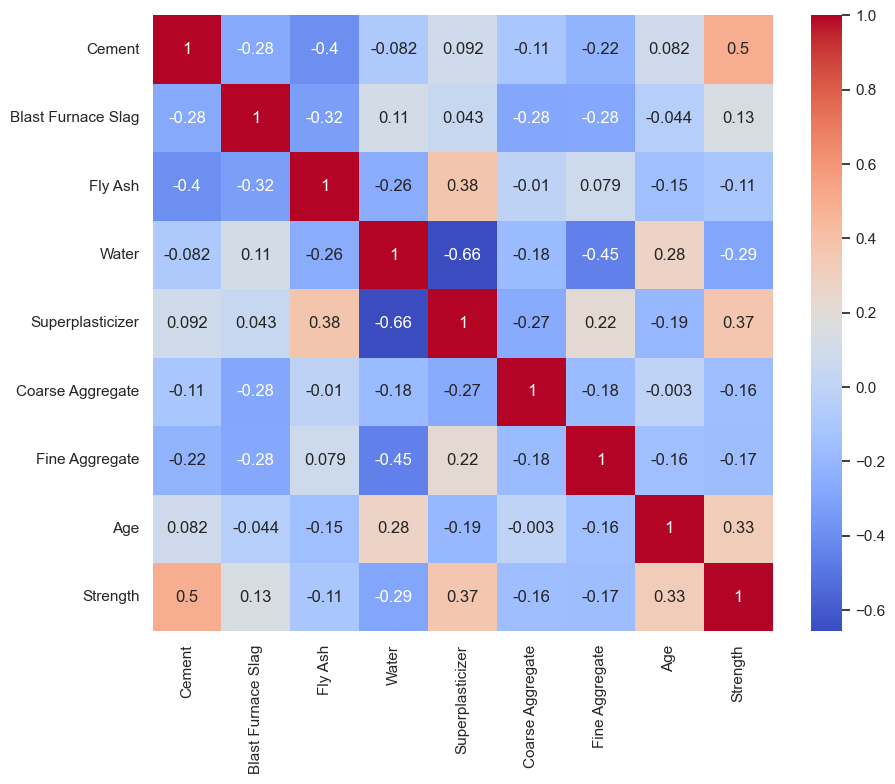

In [13]:
# The same can be visualised in the form of a heatmap.

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')
plt.show()

# Data Preprocessing

## Handling missing values(If any)

In [14]:
# Checking what percent of values are missing in each feature.

pd.DataFrame(data=df.isnull().sum()/len(df)*100, columns=['Missing value %'], index = df.columns)

Missing value %
Cement                          0.0
Blast Furnace Slag              0.0
Fly Ash                         0.0
Water                           0.0
Superplasticizer                0.0
Coarse Aggregate                0.0
Fine Aggregate                  0.0
Age                             0.0
Strength                        0.0

There are no missing values present in the dataset.

In [15]:
# Renaming the column to Age_days as it mentions the number of days after the mix.

df = df.rename(columns={'Age':'Age_days'})

Label encoding is not required as all the features are of numerical datatype.

In [16]:
pd.DataFrame(data=df.dtypes, columns=['Data type'], index = df.columns)

Data type
Cement               float64
Blast Furnace Slag   float64
Fly Ash              float64
Water                float64
Superplasticizer     float64
Coarse Aggregate     float64
Fine Aggregate       float64
Age_days               int64
Strength             float64

In [17]:
# Copying the dataset as df_model for further steps in order to retain the initial dataset features.

df_model = df.copy()

## Handling Outliers

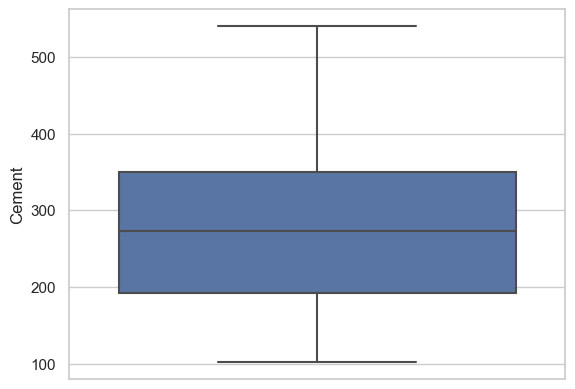

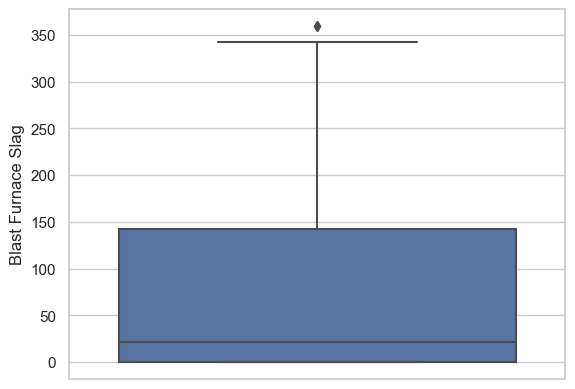

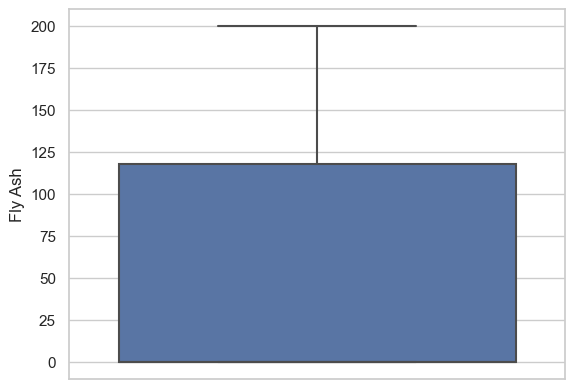

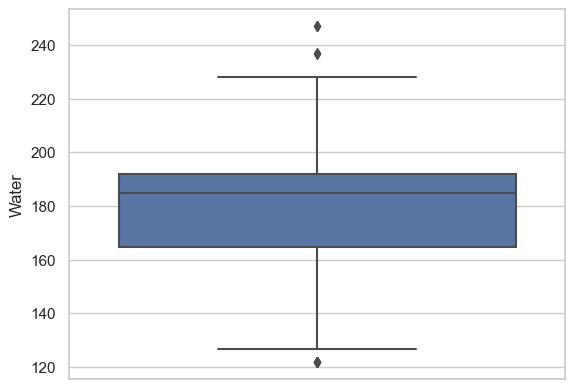

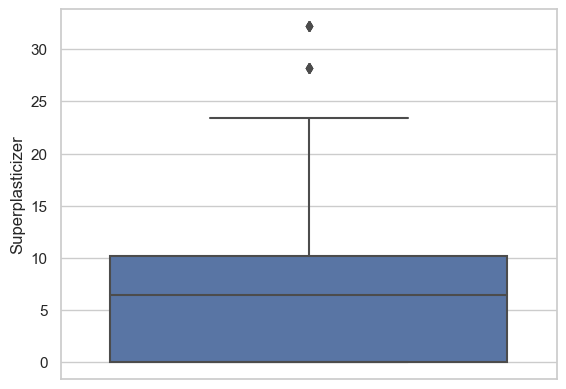

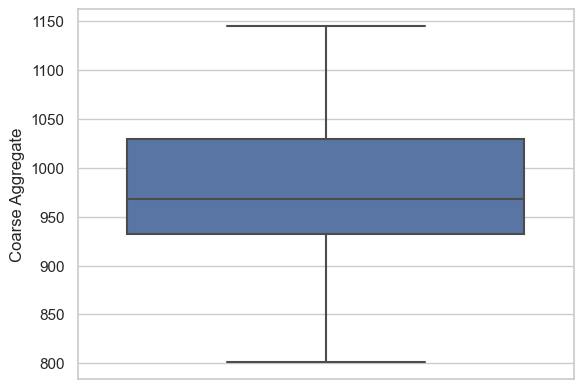

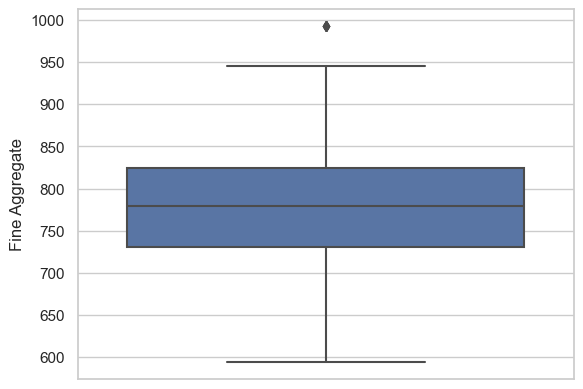

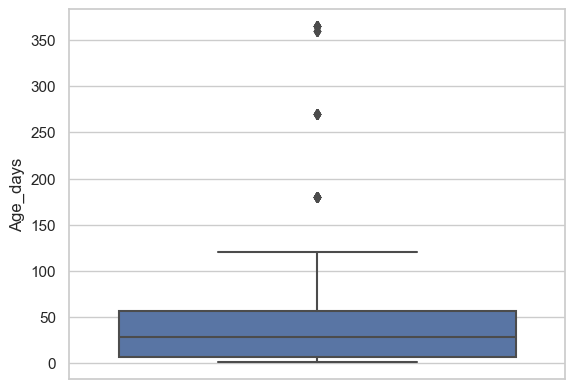

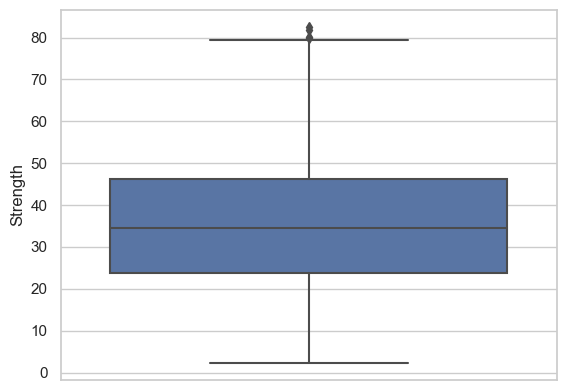

In [18]:
# Handling outliers using quantile method.

def box_plot(cols):
    sns.boxplot(y = df_model[cols])
    plt.show()
for i in list(df_model.columns):
    box_plot(i)

Here using the inter quartile range, the data values are checked if they exceed the upper limit or lower limit and those respective values are replaced by the upper limit and lower limit respectively. This approach is called capping.

In [19]:
Q1 = df_model['Blast Furnace Slag'].quantile(0.25)
Q3 = df_model['Blast Furnace Slag'].quantile(0.75)

IQR = Q3 - Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

In [20]:
df_model['Blast Furnace Slag'] = np.where(df_model['Blast Furnace Slag'] > upper_limit, upper_limit, 
                                         np.where(df_model['Blast Furnace Slag']<lower_limit, lower_limit, df_model['Blast Furnace Slag']))

In [21]:
Q1 = df_model['Water'].quantile(0.25)
Q3 = df_model['Water'].quantile(0.75)

IQR = Q3 - Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

In [22]:
df_model['Water'] = np.where(df_model['Water'] > upper_limit, upper_limit, 
                                         np.where(df_model['Water']<lower_limit, lower_limit, df_model['Water']))

In [23]:
Q1 = df_model['Superplasticizer'].quantile(0.25)
Q3 = df_model['Superplasticizer'].quantile(0.75)

IQR = Q3 - Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

In [24]:
df_model['Superplasticizer'] = np.where(df_model['Superplasticizer'] > upper_limit, upper_limit, 
                                         np.where(df_model['Superplasticizer']<lower_limit, lower_limit, df_model['Superplasticizer']))

In [25]:
Q1 = df_model['Fine Aggregate'].quantile(0.25)
Q3 = df_model['Fine Aggregate'].quantile(0.75)

IQR = Q3 - Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

In [26]:
df_model['Fine Aggregate'] = np.where(df_model['Fine Aggregate'] > upper_limit, upper_limit, 
                                         np.where(df_model['Fine Aggregate']<lower_limit, lower_limit, df_model['Fine Aggregate']))

In [27]:
Q1 = df_model['Age_days'].quantile(0.25)
Q3 = df_model['Age_days'].quantile(0.75)

IQR = Q3 - Q1

upper_limit = int(Q3 + 1.5*IQR - 0.5)
lower_limit = int(Q1 - 1.5*IQR + 0.5)

In [28]:
df_model['Age_days'] = np.where(df_model['Age_days'] > upper_limit, upper_limit, 
                                         np.where(df_model['Age_days']<lower_limit, lower_limit, df_model['Age_days']))

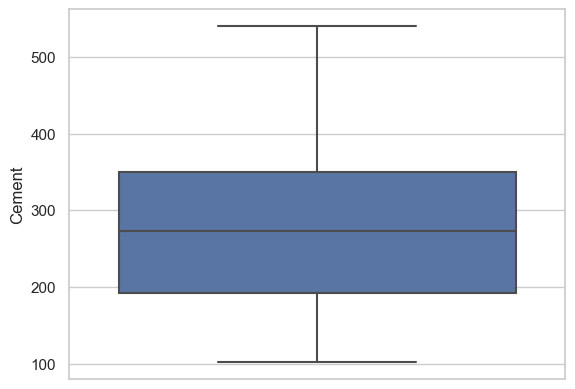

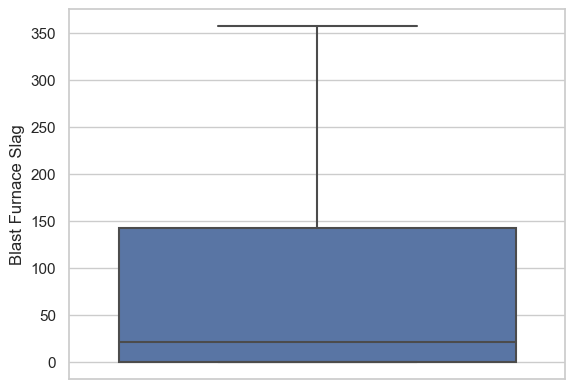

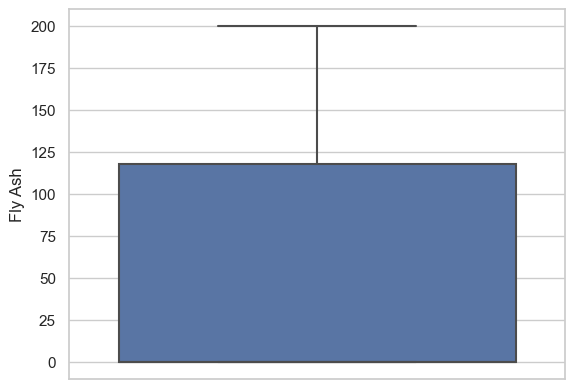

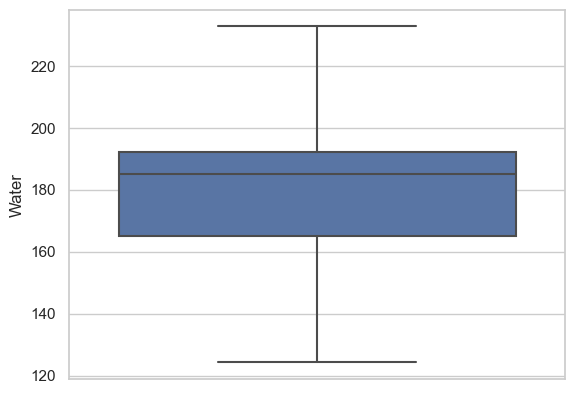

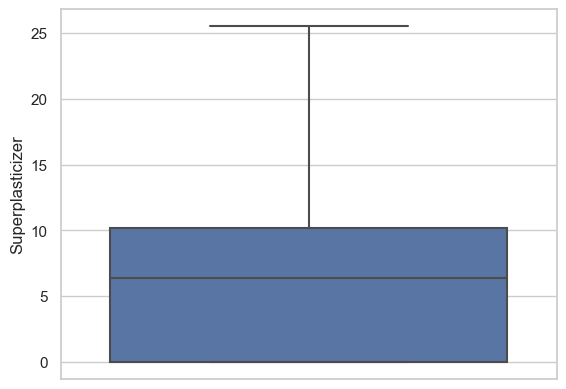

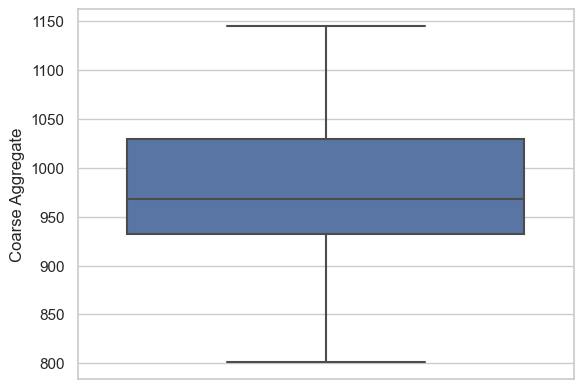

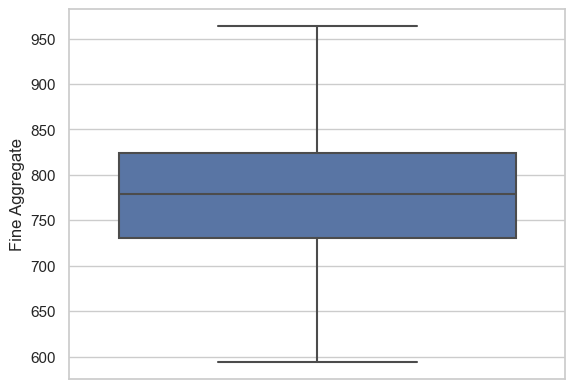

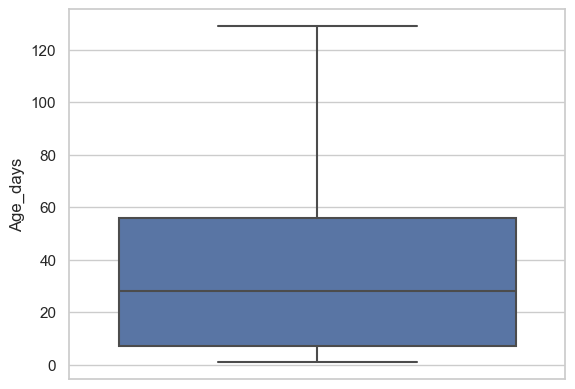

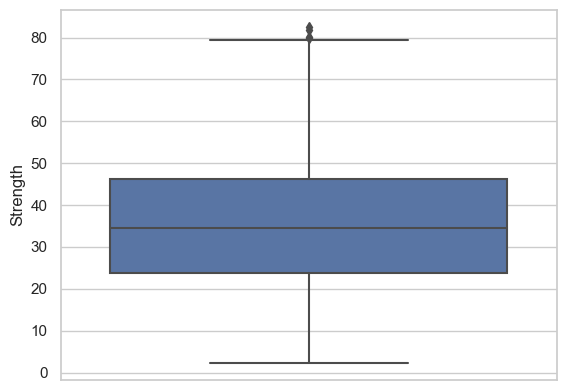

In [29]:
# Rechecking if all the outliers are handled by capping approach.

def box_plot(cols):
    sns.boxplot(y = df_model[cols])
    plt.show()
for i in list(df_model.columns):
    box_plot(i)

The target variable is not treated because:

Treating outliers in the target variable can lead to biased model predictions. 

Capping outliers in the target variable may make the model less robust.

Outliers in the target variable might be legitimate data points that capture real-world variation or extreme cases. Removing or capping these outliers could lead to a loss of valuable information and potentially distort the modeling process.

## Feature Scaling

Feature scaling may not be necessary since the values in each column are in the same order of magnitude, typically in the hundreds and thousands.

In [30]:
x = df_model.drop(['Strength'],axis=1)
y = df_model['Strength']

In [31]:
# Scaling is done in order to check multi collinearity using VIF.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_sc = scaler.fit_transform(x)

In [32]:
# Variance inflation factor to check the multicollinearity.

from statsmodels.stats.outliers_influence import variance_inflation_factor

variable = x_sc

vif = pd.DataFrame()

vif['VIF values'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif['Feature'] = x.columns

In [33]:
vif

VIF values             Feature
0    7.494179              Cement
1    7.232878  Blast Furnace Slag
2    6.112605             Fly Ash
3    7.170806               Water
4    3.111470    Superplasticizer
5    5.079071    Coarse Aggregate
6    6.988814      Fine Aggregate
7    1.054073            Age_days

Since most of the variables are not normally distributed, it is better to apply Power Transformations in order to obtain better predictions

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Transformation using Power Transformation (Yeo-Johnson)

### The Yeo-Johnson transformer is a mathematical transformation used to modify the distribution of data. It is similar to the Box-Cox transformation but offers greater flexibility by allowing it to be applied to data with both positive and negative values. The Yeo-Johnson transformation is often used in data preprocessing to make data more closely approximate a normal distribution or to stabilize variance, which can be beneficial for various statistical modeling techniques, including linear regression. It involves applying a power function to each data point, with a parameter (lambda, λ) that determines the type and strength of the transformation. This flexibility makes it a useful tool for addressing data distribution issues and improving the assumptions of statistical models.

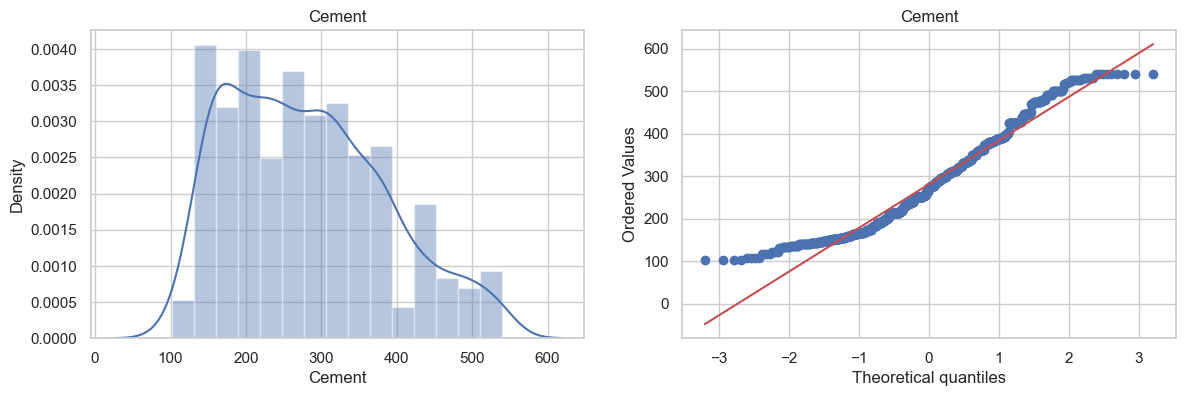

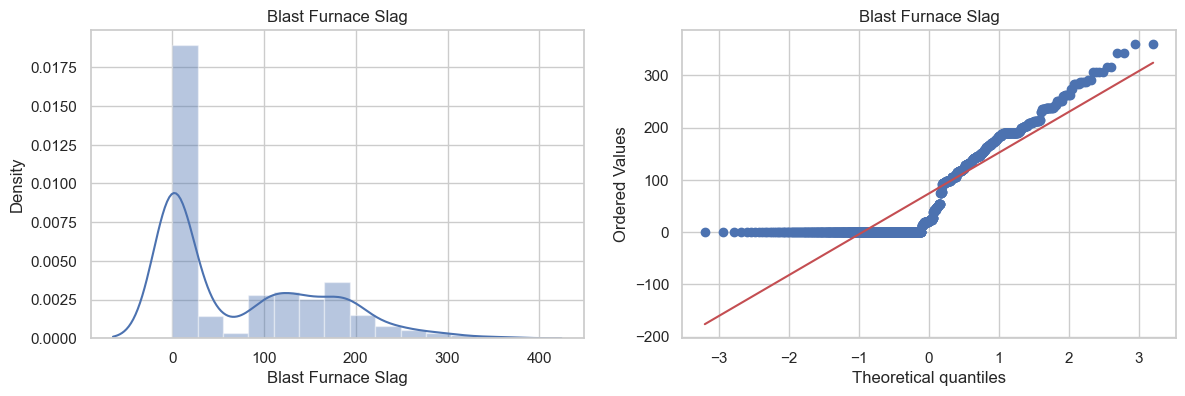

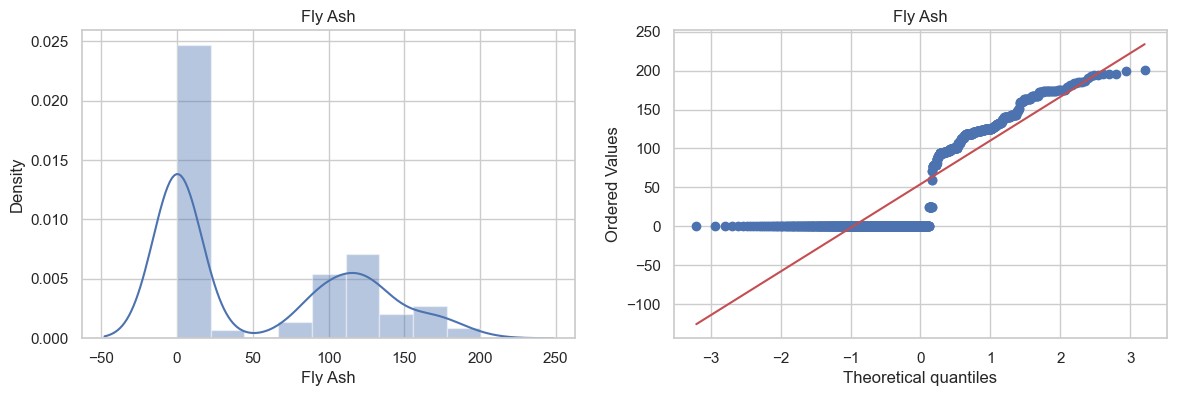

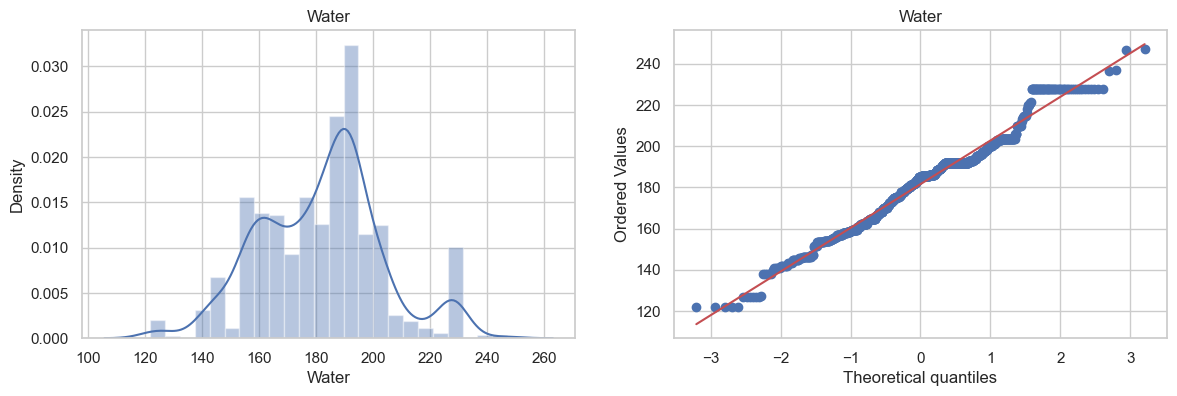

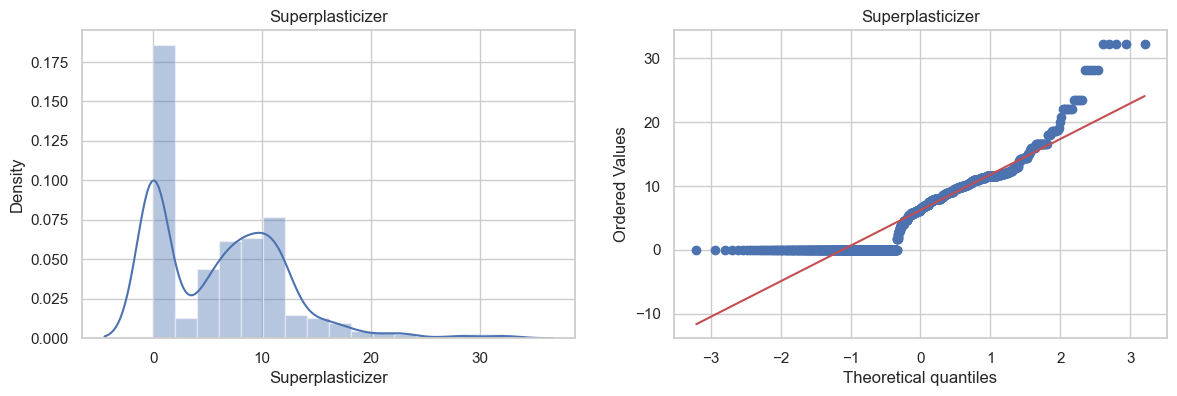

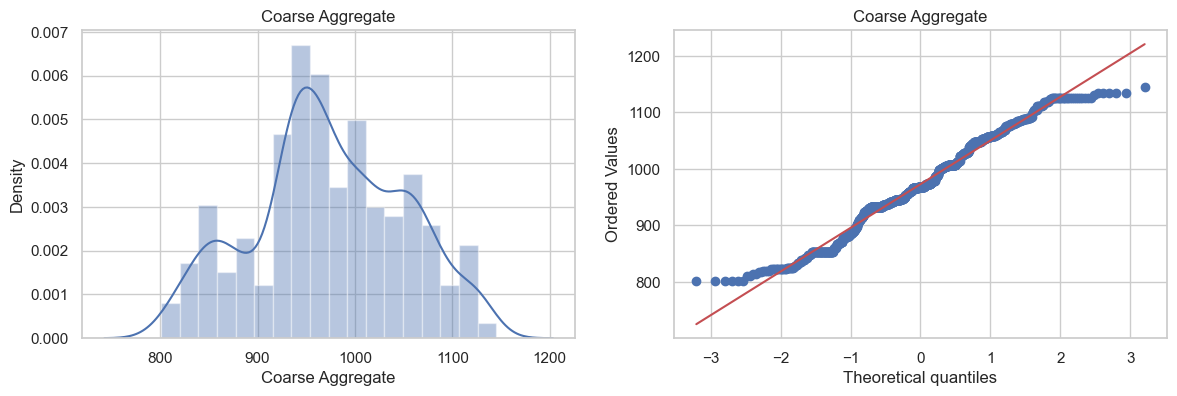

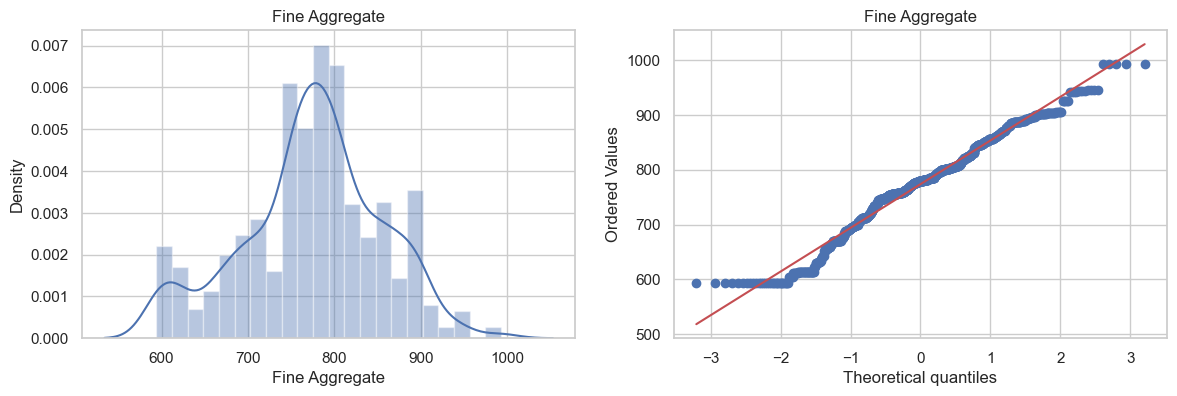

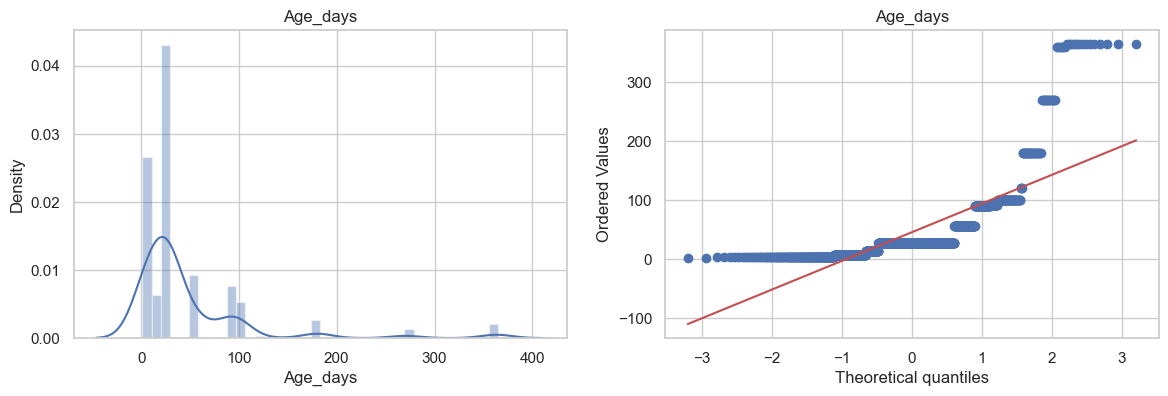

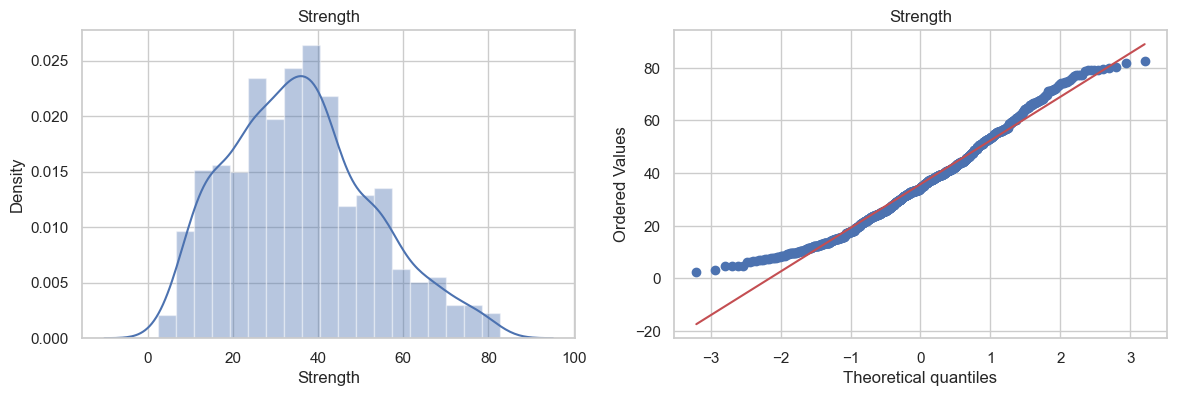

In [36]:
# Checking the distribution of the features before transormations along with q-q plot

for col in df.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(df[col], dist = 'norm', plot = plt)
    plt.title(col)
    
    plt.show()

If the points lie on the red line on the q-q plots, then the data is said to be normally distributed.

In [37]:
# Applying Yeo-Johnson transformation

from sklearn.preprocessing import PowerTransformer
pt_yj = PowerTransformer(method='yeo-johnson')
x_train_tf = pt_yj.fit_transform(x_train)
x_test_tf = pt_yj.fit_transform(x_test)

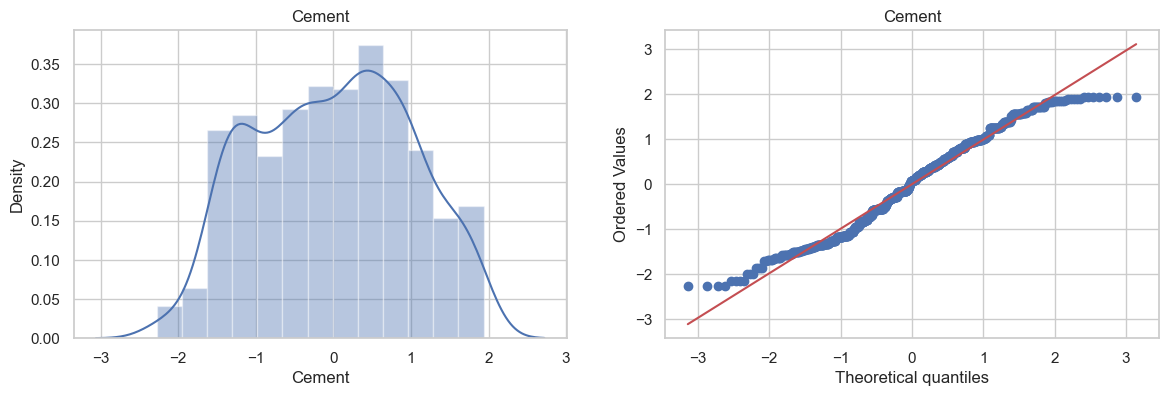

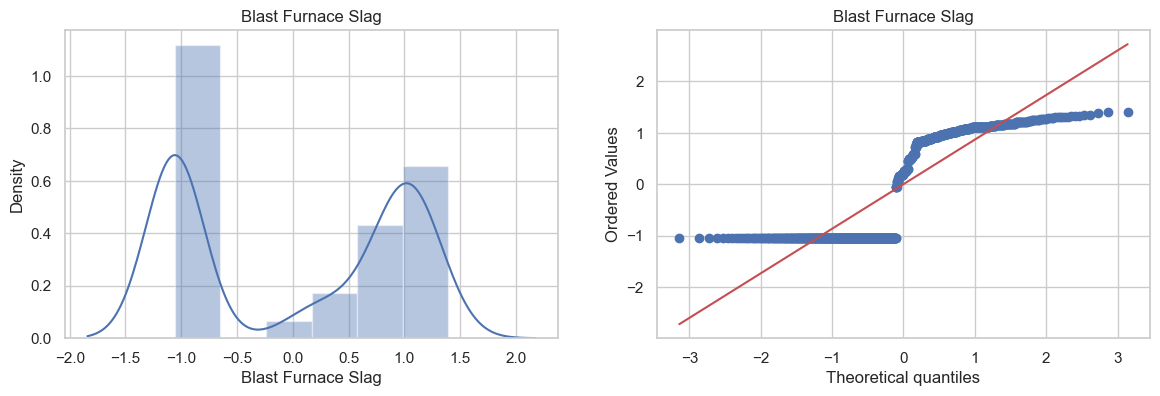

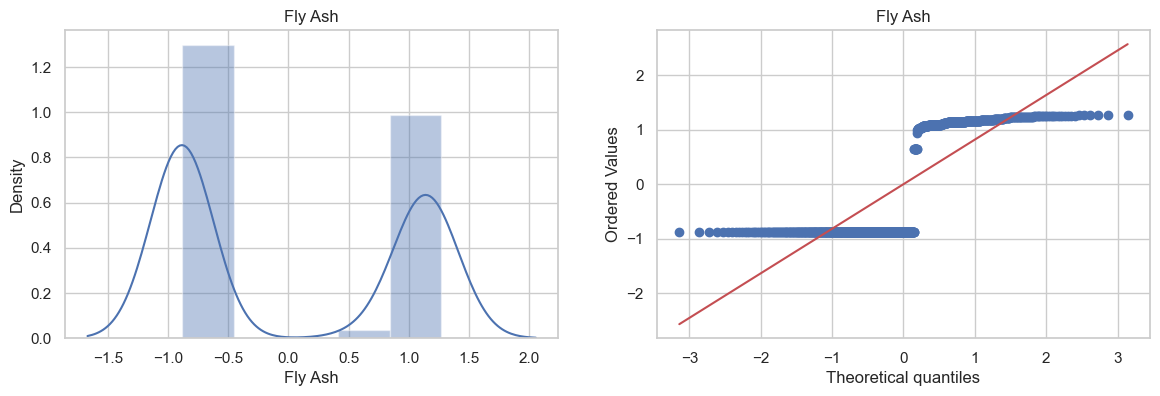

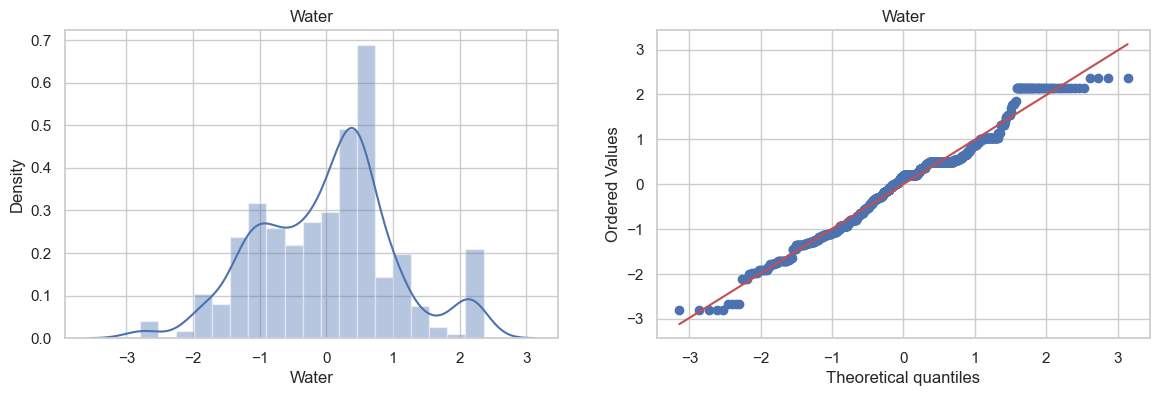

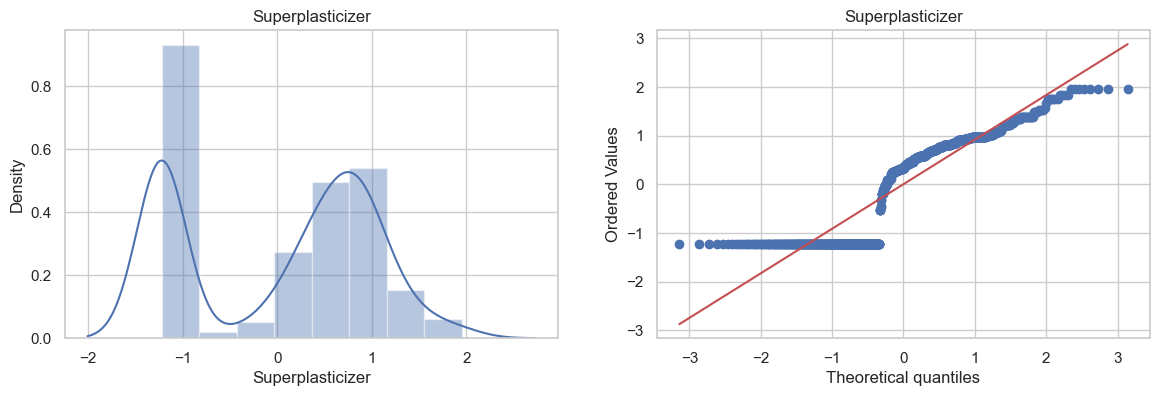

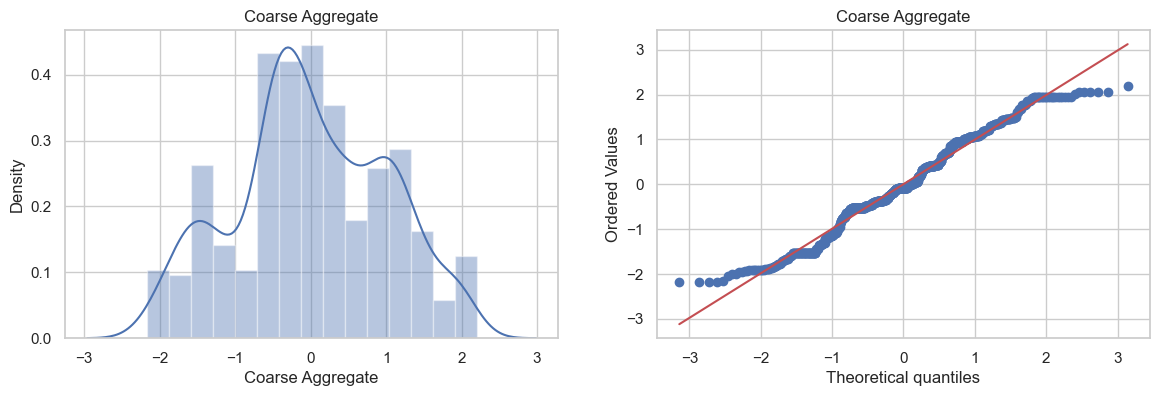

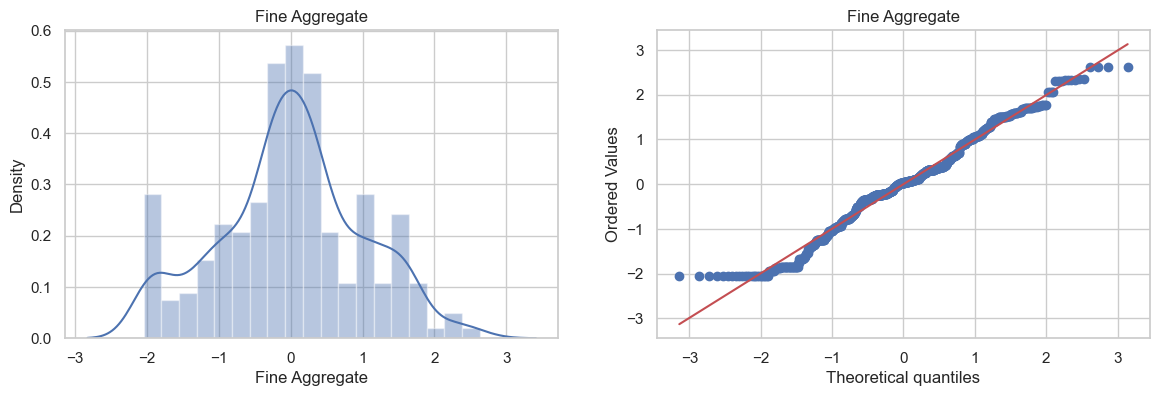

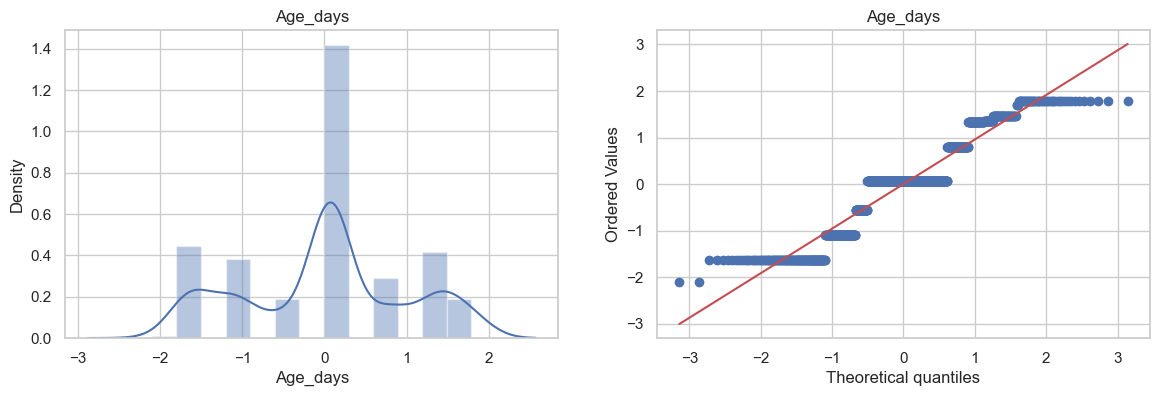

In [38]:
# After transformation

x_tf = pd.DataFrame(x_train_tf, columns=x.columns)
for col in x_tf.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_tf[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(x_tf[col], dist = 'norm', plot = plt)
    plt.title(col)
    
    plt.show()

In [39]:
# Building Linear regression model using the transformed data

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [40]:
linear_model = LinearRegression()
linear_model.fit(x_train_tf, y_train)
y_pred_train = linear_model.predict(x_train_tf)
y_pred_test = linear_model.predict(x_test_tf)

In [41]:
print('Train Accuracy',r2_score(y_train, y_pred_train))
print('\n')
print('Test Accuracy',r2_score(y_test, y_pred_test))
print('\n')
print('Mean Absolute Error for test',mean_absolute_error(y_test, y_pred_test))
print('\n')
print('Mean Absolute Percent Error for test',mean_absolute_percentage_error(y_test, y_pred_test)*100)
print('\n')
print('Root Mean Squared Error for test',np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('\n')
print('Cross Validation score using train data',round(np.mean(cross_val_score(linear_model, x_train_tf, y_train, cv=10, scoring='r2')),4))
print('\n')
print('Cross Validation score using test data',round(np.mean(cross_val_score(linear_model, x_test_tf, y_test, cv=10, scoring='r2')),4))

Train Accuracy 0.8111627797663701


Test Accuracy 0.8193207891028744


Mean Absolute Error for test 5.706503454159843


Mean Absolute Percent Error for test 18.998060651528537


Root Mean Squared Error for test 6.823258601282731


Cross Validation score using train data 0.8033


Cross Validation score using test data 0.8113


In [42]:
# Accuracy and Error values for the model with data before transformation
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)
y_train_pred = lin_model.predict(x_train)
y_test_pred = lin_model.predict(x_test)

In [43]:
print('Train Accuracy without transformation',r2_score(y_train, y_train_pred))
print('\n')
print('Test Accuracy without transformation',r2_score(y_test, y_test_pred))
print('\n')
print('Mean Absolute Error for test without transformation',mean_absolute_error(y_test, y_test_pred))
print('\n')
print('Mean Absolute Percent Error for test without transformation',mean_absolute_percentage_error(y_test, y_test_pred)*100)
print('\n')
print('Root Mean Squared Error for test without transformation',np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('\n')
print('Cross Validation score using train data',round(np.mean(cross_val_score(lin_model, x_train, y_train, cv=10, scoring='r2')),4))
print('\n')
print('Cross Validation score using test data',round(np.mean(cross_val_score(lin_model, x_test, y_test, cv=10, scoring='r2')),4))

Train Accuracy without transformation 0.7242896742987298


Test Accuracy without transformation 0.7462837259097022


Mean Absolute Error for test without transformation 6.377152637239911


Mean Absolute Percent Error for test without transformation 22.298223155917025


Root Mean Squared Error for test without transformation 8.085593457317144


Cross Validation score using train data 0.7099


Cross Validation score using test data 0.7446


As observed the accuracy has increased by 10% after the transformation

<Axes: xlabel='Strength'>

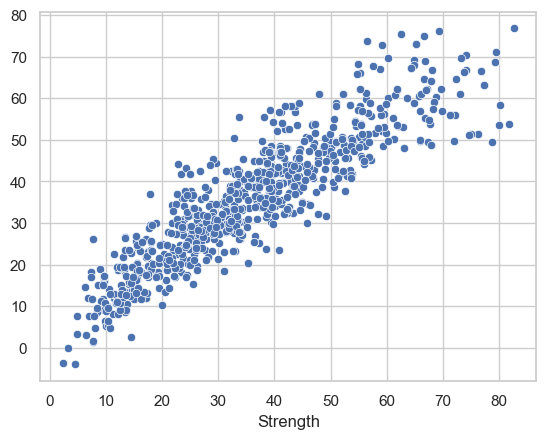

In [44]:
# Checking the linearity of the model

sns.scatterplot(x = y_train, y=y_pred_train)

<Axes: xlabel='Strength', ylabel='Density'>

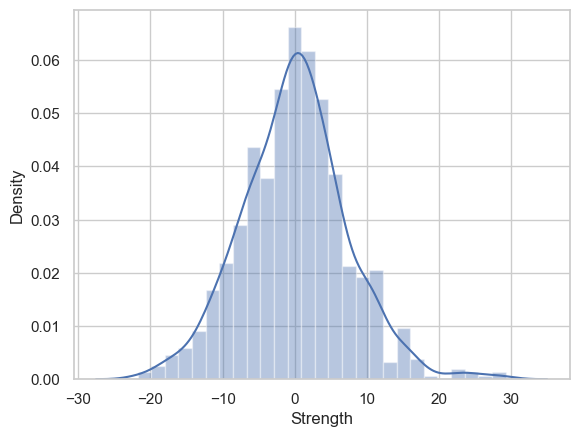

In [45]:
# Checking the normalcy of the error values by doing a dist plot of actual - predicted values

sns.distplot(y_train - y_pred_train)

Considered train data since the test values are significantly less due to the percentage split.

# Building Lasso and Ridge Regression models, to make sure there is no bias and variance in the data 

In [46]:
# Lasso regression model
from sklearn.linear_model import Lasso,Ridge
lasso_model_tf = Lasso(alpha=0.1)
lasso_model_tf.fit(x_train_tf, y_train)
y_pred_train_lasso_tf = lasso_model_tf.predict(x_train_tf)
y_pred_test_lasso_tf = lasso_model_tf.predict(x_test_tf)

In [47]:
print('Train Accuracy',r2_score(y_train, y_pred_train_lasso_tf))
print('\n')
print('Test Accuracy',r2_score(y_test, y_pred_test_lasso_tf))
print('\n')
print('Mean Absolute Error for test',mean_absolute_error(y_test, y_pred_test_lasso_tf))
print('\n')
print('Mean Absolute Percent Error for test',mean_absolute_percentage_error(y_test, y_pred_test_lasso_tf)*100)
print('\n')
print('Root Mean Squared Error for test',np.sqrt(mean_squared_error(y_test, y_pred_test_lasso_tf)))
print('\n')
print('Cross Validation score using train data',round(np.mean(cross_val_score(lasso_model_tf, x_train_tf, y_train, cv=10, scoring='r2')),4))
print('\n')
print('Cross Validation score using test data',round(np.mean(cross_val_score(lasso_model_tf, x_test_tf, y_test, cv=10, scoring='r2')),4))

Train Accuracy 0.8107679052747877


Test Accuracy 0.8185236480518969


Mean Absolute Error for test 5.72166392067209


Mean Absolute Percent Error for test 18.97006378401201


Root Mean Squared Error for test 6.8382938493723815


Cross Validation score using train data 0.8034


Cross Validation score using test data 0.8112


In [48]:
# Ridge Regression model

ridge_model_tf = Ridge(alpha=0.3)
ridge_model_tf.fit(x_train_tf, y_train)
y_pred_train_ridge_tf = ridge_model_tf.predict(x_train_tf)
y_pred_test_ridge_tf = ridge_model_tf.predict(x_test_tf)

In [49]:
print('Train Accuracy',r2_score(y_train, y_pred_train_ridge_tf))
print('\n')
print('Test Accuracy',r2_score(y_test, y_pred_test_ridge_tf))
print('\n')
print('Mean Absolute Error for test',mean_absolute_error(y_test, y_pred_test_ridge_tf))
print('\n')
print('Mean Absolute Percent Error for test',mean_absolute_percentage_error(y_test, y_pred_test_ridge_tf)*100)
print('\n')
print('Root Mean Squared Error for test',np.sqrt(mean_squared_error(y_test, y_pred_test_ridge_tf)))
print('\n')
print('Cross Validation score using train data',round(np.mean(cross_val_score(ridge_model_tf, x_train_tf, y_train, cv=10, scoring='r2')),4))
print('\n')
print('Cross Validation score using test data',round(np.mean(cross_val_score(ridge_model_tf, x_test_tf, y_test, cv=10, scoring='r2')),4))

Train Accuracy 0.8111625949815024


Test Accuracy 0.8193236115656519


Mean Absolute Error for test 5.706853732944906


Mean Absolute Percent Error for test 18.997801317324768


Root Mean Squared Error for test 6.82320530663821


Cross Validation score using train data 0.8033


Cross Validation score using test data 0.8114


In [50]:
# This confirms that there is no problem of either overfitting or underfitting

In [51]:
# Building an OLS model using statsmodels

from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf 

In [52]:
ols_model = smf.OLS(endog= y_train, exog=x_train).fit()

In [53]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Strength   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              1942.
Date:                Wed, 27 Sep 2023   Prob (F-statistic):                        0.00
Time:                        11:57:04   Log-Likelihood:                         -2965.9
No. Observations:                 824   AIC:                                      5948.
Df Residuals:                     816   BIC:                                      5986.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Cement                 0.1120      0.004     28.038      0.000       0.104       0.120
Blast Furnace Slag     0.0984      0.005     19.804      0.000       0.089       0.108
Fly Ash                0.0709      0.008      9.305      0.000       0.056       0.086
Water                 -0.1797      0.015    -11.736      0.000      -0.210      -0.150
Superplasticizer       0.2346      0.086      2.719      0.007       0.065       0.404
Coarse Aggregate       0.0063      0.003      2.183      0.029       0.001       0.012
Fine Aggregate         0.0110      0.003      3.327      0.001       0.005       0.017
Age_days               0.2548      0.009     28.239      0.000       0.237       0.272
==============================================================================
Omnibus:                        8.506   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               10.130
Skew:                           0.145   Prob(JB):                      0.00631
Kurtosis:                       3.459   Cond. No.                         363.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# The model is giving satisfactorily good results. Hence making it ready for deployment in production.